# 치즈
- https://www.acmicpc.net/problem/2636

In [26]:
# 판의 세로와 가로의 길이
height, length = map(int, input().split())

graph = []
for _ in range(height):
    graph.append(list(map(int, input().split())))

from collections import deque

# 상하좌우
dx = [-1, 1, 0, 0]
dy = [0, 0, -1, 1]

def bfs():
    visited = [[False] * length for _ in range(height)]
    q = deque()
    q.append([0, 0])
    visited[0][0] = True
    cnt = 0
    
    while q:
        # 행, 열
        y, x = q.popleft()
        # 상하좌우 확인
        for i in range(4):
            nx = x + dy[i]
            ny = y + dx[i]
            if 0 <= ny < height and 0 <= nx < length and not visited[ny][nx]:
                if graph[ny][nx] == 0: # 공기이면
                    visited[ny][nx] = True
                    q.append([ny, nx])
                elif graph[ny][nx] == 1: # 치즈이면
                    graph[ny][nx] = 0 # 공기로 바꿔줌
                    cnt += 1
                    visited[ny][nx] = True
    
    cheese.append(cnt)
    return cnt

# 사라지는 가장자리
cheese = []
time = 0
while True:
    cnt = bfs()
    if cnt == 0: # 치즈가 다 사라지면
        break
    time += 1

print(time)
print(cheese[-2])

13 12
0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 1 1 0 0
0 1 1 1 0 0 0 1 1 0 0 0
0 1 1 1 1 1 1 0 0 0 0 0
0 1 1 1 1 1 0 1 1 0 0 0
0 1 1 1 1 0 0 1 1 0 0 0
0 0 1 1 0 0 0 1 1 0 0 0
0 0 1 1 1 1 1 1 1 0 0 0
0 0 1 1 1 1 1 1 1 0 0 0
0 0 1 1 1 1 1 1 1 0 0 0
0 0 1 1 1 1 1 1 1 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0
3
5


# 타임머신
- https://www.acmicpc.net/problem/11657

**벨만 포드 최단 경로 알고리즘**
- 음수 간선에 관하여 최단 경로 문제는 다음과 같이 분류
    1) 모든 간선이 양수인 경우
    2) 음수 간선이 있는 경우
        1) 음수 간선 순환은 없는 경우
        2) 음수 간선 순환이 있는 경우
- 벨만 포드 최단경로 알고리즘은 <u>음의 간선이 포함된 상황</u>에서도 사용할 수 있다.
    - 또한 <u> 음수 간선의 순환을 감지 </u>할 수 있다.
    - 기본 시간 복잡도는 $O(VE)$로 다익스트라 알고리즘($ElogV$)에 비해 느리다.

1. 출발 노드를 설정한다.
2. 최단 거리 테이블을 초기화한다.
3. 다음의 과정을 N-1번 반복한다.
    1. 전체 간선 E개를 하나씩 확인한다.
    2. 각 간선을 거쳐 다른 노드로 가는 비용을 계산하여 최단 거리 테이블을 갱신한다.
- 만약 <u> 음수 간선 순환이 발생하는지 체크하고 싶다면 </u> <b>3번의 과정을 한번 더 수행</b>한다.
    - 이때 최단 거리 테이블이 갱신된다면 음수 간선 순환이 존재하는 것이다.

**벨만 포드 알고리즘 VS 다익스트라 알고리즘**
- 다익스트라 알고리즘
    - <u>매번 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택</u>한다.
    - 음수 간선이 없을 때 정상적으로 동작한다.
- 벨만 포드 알고리즘
    - <u>매번 모든 간선을 전부 확인</u>한다.
        - 따라서 다익스트라 알고리즘에서의 최적의 해를 항상 포함한다.
    - 다익스트라 알고리즘에 비해서 시간이 오래 걸리지만 음수 간선 순환을 탐지할 수 있다.

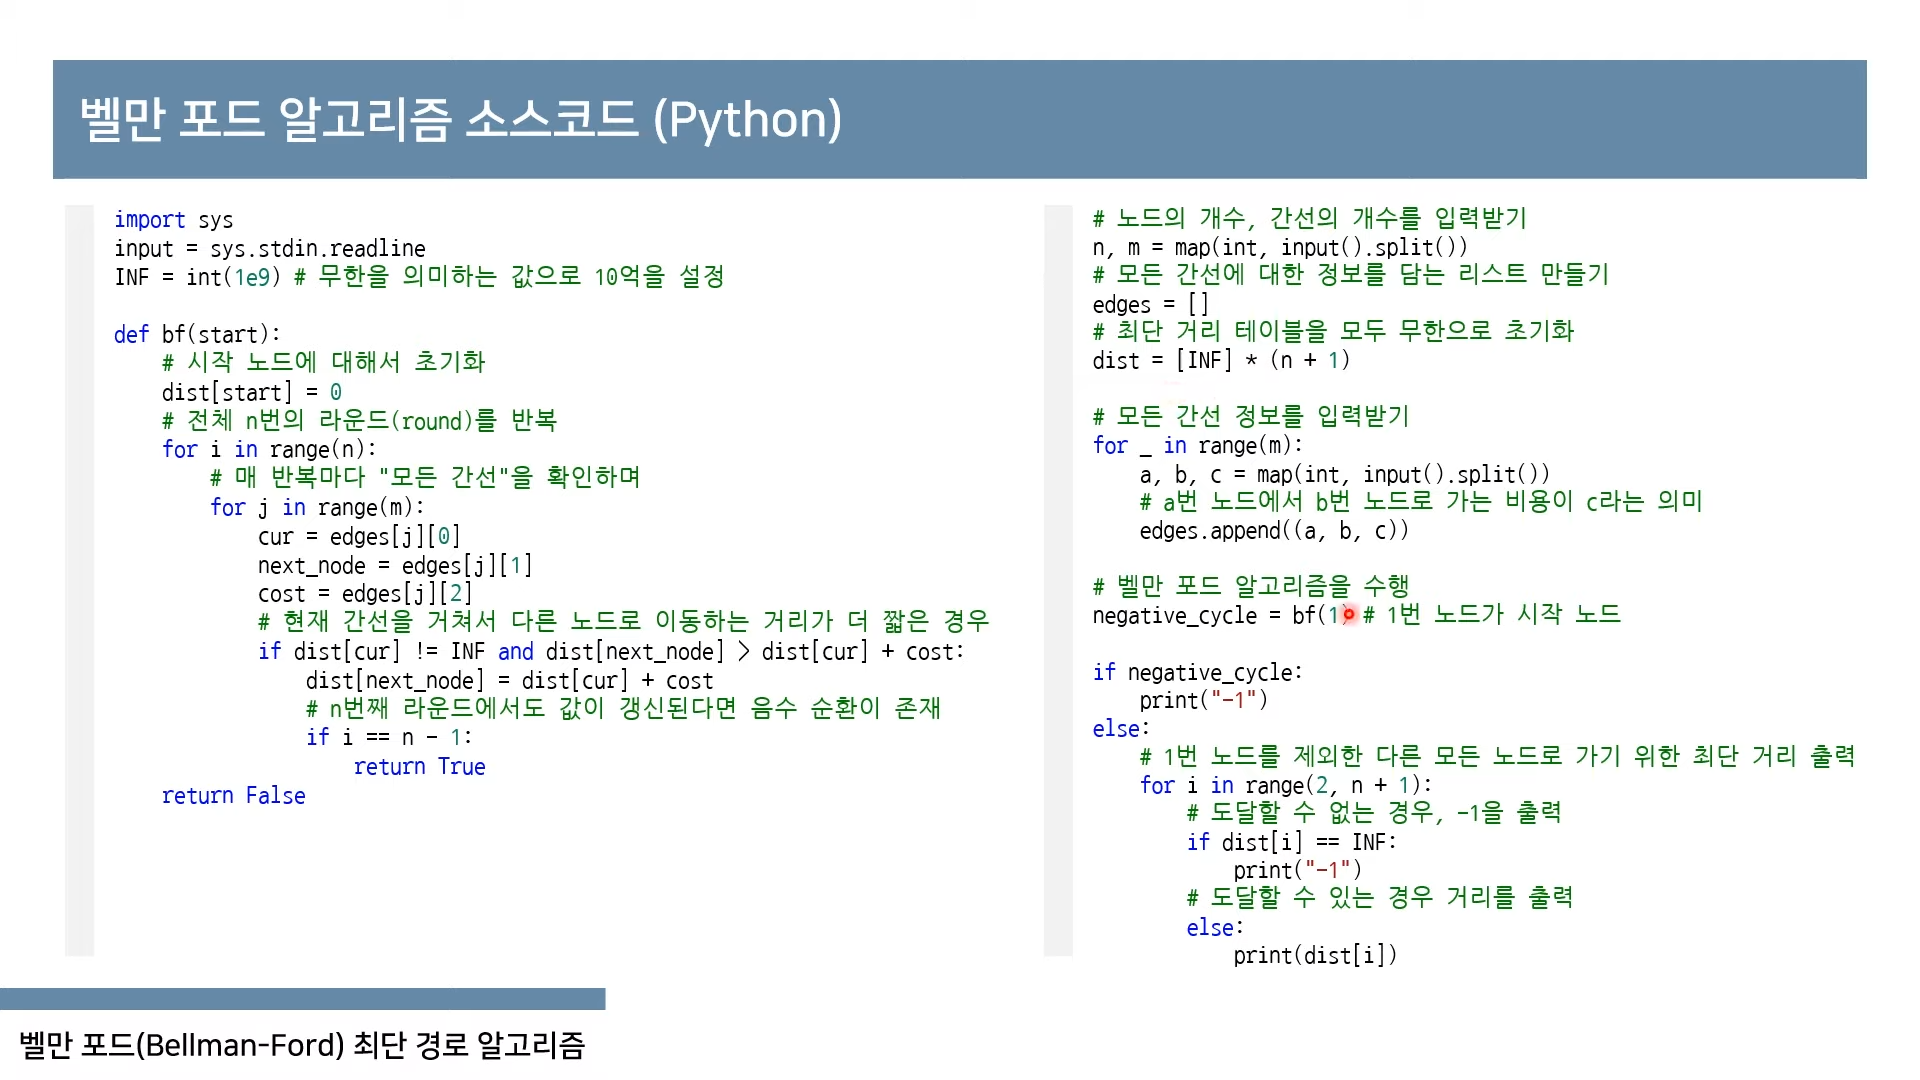

In [33]:
# 벨만 포드 알고리즘 소스코드
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

def bf(start):
    # 시작 노드에 대해서 초기화
    dist[start] = 0
    # 전체 n번의 라운드(round)를 반복
    for i in range(n):
        # 매 반복마다 "모든 간선"을 확인하며
        for j in range(m):
            cur = edges[j][0]
            next_node = edges[j][1]
            cost = edges[j][2]
            # 현재 간선을 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if dist[cur] != INF and dist[next_node] > dist[cur] + cost:
                dist[next_node] = dist[cur] + cost
                # n번째 라운드에서도 값이 갱신된다면 음수 순환이 존재
                if i == n - 1:
                    return True
    return False

# 도시(노드), 버스노선(간선)의 개수
n, m = map(int, input().split())
# 모든 간선에 대한 정보를 담는 리스트 만들기
edges = []
# 최단 거리 테이블 초기화
dist = [INF] * (n+1)

for _ in range(m):
    a, b, cost = map(int, input().split())
    edges.append((a, b, cost))
    
# 벨만 포드 알고리즘을 수행
negative_cycle = bf(1) # 1번 노드가 시작 노드

if negative_cycle:
    print("-1")
else:
    # 1번 노드를 제외한 다른 모든 노드로 가기 위한 최단 거리 출력
    for i in range(2, n+1):
        # 도달할 수 없는 경우, -1을 출력
        if dist[i] == INF:
            print("-1")
        # 도달할 수 있는 경우, 거리를 출력
        else:
            print(dist[i])

3 4
1 2 4
1 3 3
2 3 -4
3 1 -2
-1


# 작업
- https://www.acmicpc.net/problem/2056

In [92]:
from collections import deque
import copy

# 작업의 개수
n = int(input())
# 모든 노드에 대한 진입차수는 0으로 초기화
indegree = [0] * (n+1)
# 각 노드에 연결된 간선 정보를 담기 위한 연결 리스트(그래프) 초기화
graph = [[] for i in range(n+1)]
# 각 작업 시간을 0으로 초기화
time = [0] * (n+1)

# 방향 그래프의 모든 간선 정보를 입력받기
for i in range(1, n+1):
    data = list(map(int, input().split()))
    time[i] = data[0] # 첫 번째 수는 작업에 걸리는 시간
    for x in data[2:]:
        indegree[i] += 1
        graph[x].append(i)

# 위상 정렬 함수
def topology_sort():
    result = copy.deepcopy(time)
    q = deque()
    
    # 처음 시작할 때는 진입차수가 0인 노드를 큐에 삽입
    for i in range(1, n+1):
        if indegree[i] == 0:
            q.append(i)
    # 큐가 빌 때까지 반복
    while q:
        now = q.popleft()
        # 해당 원소와 연결된 노드들의 진입차수에서 1 빼기
        for i in graph[now]:
            result[i] = max(result[i], result[now] + time[i])
            indegree[i] -= 1
            # 새롭게 진입차수가 0이 되는 노드를 큐에 삽입
            if indegree[i] == 0:
                q.append(i)
    
    return result

result = topology_sort()

print(max(result))

7
5 0
1 1 1
3 1 2
6 1 1
1 2 2 4
8 2 2 4
4 3 3 5 6
23
